# DATA CLEANING

In [471]:
#import tools and data set
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

df = pd.read_excel("Teat Number Data_SP2021.xlsx",
                   skiprows = 1 #get rid of difficult column headers situation
                  )
df.head()

#separate sow data from original data

,Sow ID,Sow's Teat #,Litter #,Pig #,Sex,Teat #,Unnamed: 6
0,461 Sow has very poor reproductiv...,15.0,1,15,barrow,NaN,NaN
1,NaN,NaN,6,14,gilt,13.0,NaN
2,NaN,NaN,1,7,barrow,NaN,NaN
3,NaN,NaN,7,3,gilt,14.0,NaN
4,NaN,NaN,3,15,barrow,NaN,NaN


The Data cleaning process mostly just involves me adapting the data set that I got from you to be more friendly for use with the Python tools that I have at my disposal. I'm not going to spend a tone of time outlining what I did to do that in this document, but I will leave the comments to get a glimpse at what I was doing.

### If you just want to see the pictures and data, skip to the Data Analysis heading below!

There's alot of error messages in there. Something I'm doing with my code is frowned upon, but it is all working the way I intended it to.

In [472]:
df_sow = df[["Sow ID", "Sow's Teat #"]]
df_sow.head()

,Sow ID,Sow's Teat #
0,461 Sow has very poor reproductiv...,15.0
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN


In [473]:
df_litter = df[["Litter #", "Pig #", "Sex", "Teat #", "Unnamed: 6"]]
df_litter.head()

,Litter #,Pig #,Sex,Teat #,Unnamed: 6
0,1,15,barrow,NaN,NaN
1,6,14,gilt,13.0,NaN
2,1,7,barrow,NaN,NaN
3,7,3,gilt,14.0,NaN
4,3,15,barrow,NaN,NaN


In [474]:
#need to find the number of piglets for each sow... 

#find the index of each of the sow's ids, the space between sow ID's indicates the number of piglets
piglet_count_list = []
piglet_count = 0
false_count = 0

sow_list = df_sow["Sow ID"].isna().tolist()
#add an extra false at the end to terminate the piglet count on the last sow
sow_list.append(False)

for n in sow_list:
    
    if n == False:
        false_count = false_count + 1
        
        if false_count > 1:
            piglet_count_list.append(piglet_count)
            piglet_count = 1
            
        if false_count == 1:
            piglet_count = 1
            
    if n == True:
        piglet_count  = piglet_count + 1
        
#create a new column in the sow dataframe that assigns the piglet counts to their respective sows
df_sow.dropna(how = 'all', inplace = True)
df_sow["Piglet Count"] = piglet_count_list
df_sow.reset_index(drop = True, inplace = True)

<ipython-input-474-ec584d4d52f1>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sow.dropna(how = 'all', inplace = True)
<ipython-input-474-ec584d4d52f1>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sow["Piglet Count"] = piglet_count_list


In [475]:
# add a comments column to separate the comments from the sow ID column
correctionList = [0, 3, 7, 11]
comment_dict = {}

# for each of the troublesome rows, extract the comment from the ID and put in the comments column
for n in correctionList:
    comment = df_sow.iloc[n]["Sow ID"][17:]
    sowID = df_sow.iloc[n]["Sow ID"][:3]
    df_sow.at[n, "Sow ID"] = sowID
    df_sow.at[n, "Comments"] = comment
    
#Sow # 291 was especially bad, will do that one very specifically
df_sow.at[7, "Sow ID"] = 291
df_sow.at[7, "Comments"] = "Small bump on the sow's left shoulder area; appears to look like a small abscess"

F:\Programming\Anaconda3\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
F:\Programming\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [476]:
df_sow["Sow's Teat #"] = df_sow["Sow's Teat #"].astype(int)
df_sow['Sow ID'] = df_sow['Sow ID'].astype(str)

<ipython-input-476-4d1200a3291a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sow["Sow's Teat #"] = df_sow["Sow's Teat #"].astype(int)
<ipython-input-476-4d1200a3291a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sow['Sow ID'] = df_sow['Sow ID'].astype(str)


In [477]:
#rename the comments column to comments
df_litter.rename(columns = {"Unnamed: 6" : "Comments"}, inplace = True)

F:\Programming\Anaconda3\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [478]:
# attach a sow ID to their respective piglets

piglet_count_list = df_sow["Piglet Count"].to_list()

#create a list of ranges of indexes that indicate the start and stop of a sows piglets
count = 0
index_list = [0]
for n in piglet_count_list:
    count = count + n
    index_list.append(count)

In [479]:
index = 0
sowID_list = []
for n in range(0,133):
    if n > index_list[index + 1]-1:
        index = index + 1
    sowID = df_sow.iloc[index]["Sow ID"]
    sowID_list.append(sowID)
    
df_litter["Sow ID"] = sowID_list

<ipython-input-479-9c570996ef98>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_litter["Sow ID"] = sowID_list


In [480]:
#reset sow index as sow id at the end
df_sow.set_index("Sow ID", inplace = True)

In [481]:
# sex of piglet changed to dummy variables
df_litter = df_litter.join(pd.get_dummies(df_litter["Sex"]))
df_litter.drop(labels = "Sex", axis = 1, inplace = True)

In [482]:
#final
df_sow.to_excel("Sow Data.xlsx")
df_litter.to_excel("Piglet Data.xlsx")
display(df_sow)
df_litter

,Sow's Teat #,Piglet Count,Comments
Sow ID,,,
461,15,11,Sow has very poor reproductive conformation
181-202,14,13,NaN
189,13,9,NaN
196,14,7,Sow has really poor hoof/foot conformation
200,13,12,NaN
284,15,12,NaN
220,13,13,NaN
291,14,11,Small bump on the sow's left shoulder area; ap...
115-8,14,10,NaN


,Litter #,Pig #,Teat #,Comments,Sow ID,barrow,gilt
0,1,15,NaN,NaN,461,1,0
1,6,14,13.0,NaN,461,0,1
2,1,7,NaN,NaN,461,1,0
3,7,3,14.0,NaN,461,0,1
4,3,15,NaN,NaN,461,1,0
...,...,...,...,...,...,...,...
128,1,7,NaN,NaN,300,1,0
129,1,8,NaN,NaN,300,1,0
130,1,15,NaN,NaN,300,1,0
131,1,14,NaN,NaN,300,1,0


# DATA ANALYSIS

Here is the interesting part. I created some histograms and bar charts that might be somewhat interesting. Most notably is the 2 overlayed histograms showing the sow Teat count distribution against the distribution of litter sizes. From that it is pretty clear how often sows have more teats then they have piglets, though some overlap does exist.

Because this data set didn't have very many variables to play with, I couldn't come up with a way to apply predictive models. If there had been away, there would be some regression plots to look at and a process for coming up with equations to predict attributes of the dataset.

Nonetheless, hopefully the diagrams interest you. :)

First is some basic statistics on sows, which include in order from top to bottom:
1. the number of values
2. the mean of the values
3. the standard deviation
4. the minimum
5. the first quartile
6. the median
7. the third quartile
8. the maximum

In [483]:
#basic sow statistics
df_sow.describe()

,Sow's Teat #,Piglet Count
count,12.000000,12.000000
mean,14.166667,11.083333
std,0.937437,2.151462
min,13.000000,7.000000
25%,13.750000,9.750000
50%,14.000000,11.000000
75%,15.000000,12.250000
max,16.000000,15.000000


Here are the same statistics for the litter. I split the sex column into "barrows" and "gilts" using one hot encoding to make analysis easier. For example, the mean for barrows can also be interpreted as the percentage of barrows in this set of piglets.

(As I understand, litter # and pig # are ID numbers and probably can be dropped from the dataset, but I kept them because I wasn't sure if I could use them for something.)

In [484]:
#basic litter statistics
df_litter.describe()

,Litter #,Pig #,Teat #,barrow,gilt
count,133.000000,133.000000,65.000000,133.000000,133.000000
mean,6.187970,6.714286,13.692308,0.511278,0.488722
std,3.705341,4.098358,1.402265,0.501763,0.501763
min,1.000000,0.000000,11.000000,0.000000,0.000000
25%,3.000000,3.000000,12.000000,0.000000,0.000000
50%,6.000000,6.000000,14.000000,1.000000,0.000000
75%,9.000000,10.000000,15.000000,1.000000,1.000000
max,16.000000,18.000000,16.000000,1.000000,1.000000


This first graphic is simply a recreation of the bar chart you had in your homework sheet.

<function matplotlib.pyplot.show(*args, **kw)>

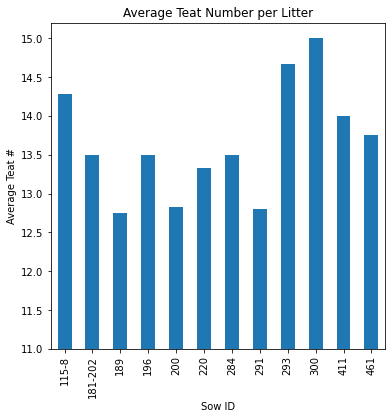

In [485]:
# a recreation of the bar chart in the submitted homework spreadsheet
df_teat_mean = df_litter.groupby(by = "Sow ID", axis = 0).mean()["Teat #"]
df_teat_mean = df_teat_mean - 11

df_teat_mean.plot(kind = 'bar',
                  bottom = 11,
                  figsize = (6,6)
                 )

plt.title("Average Teat Number per Litter")
plt.xlabel("Sow ID")
plt.ylabel("Average Teat #")
plt.savefig("Average Teat Number per Litter.png")
plt.show

# the bars aren't in the exact same place as the ones in the homework spreadsheet by the values should be the same.

This is a histogram of the Piglet Teat count, which I thought might compliment the data you had in your homework on average teat counts for each of the sows litters.

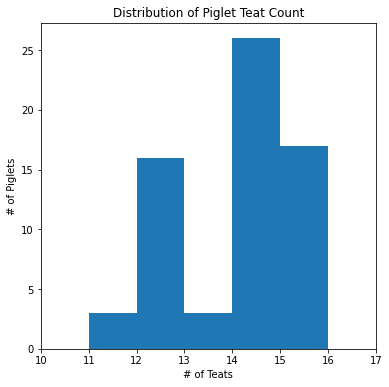

In [486]:
bin_edges = list(range(10,18))
df_litter["Teat #"].plot(kind = 'hist',
                         xticks = bin_edges,
                         figsize = (6,6),
                         bins = 5
                        )
plt.title("Distribution of Piglet Teat Count")
plt.xlabel("# of Teats")
plt.ylabel("# of Piglets")
plt.savefig("Distribution of Piglet Teat Count.png")
plt.show()

This graphic is an attempt to explore the relationship between the sow's teat count and the size of their litters. It can be seen that the distribution of the sows teat count lies on the upper extreme of the distribution of litter size.

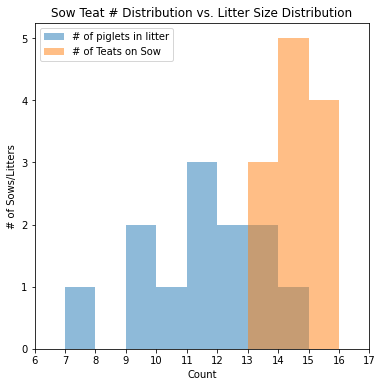

In [487]:
bin_edges = list(range(6,18))
plt.figure(figsize = (6,6))
plt.hist(df_sow["Piglet Count"], bins = 8, alpha = 0.5, label = "# of piglets in litter")
plt.hist(df_sow["Sow's Teat #"], bins = 3, alpha = 0.5, label = "# of Teats on Sow")

plt.xticks(ticks = bin_edges)
plt.xlabel("Count")
plt.ylabel("# of Sows/Litters")
plt.title("Sow Teat # Distribution vs. Litter Size Distribution")
plt.legend(loc = 'upper left')
plt.savefig("Sow Teat # Distribution vs Litter Size Distribution.png")
plt.show()

This is a stacked bar chart that shows litter size for each sow, and the ratio of gilts to barrows within each litter.

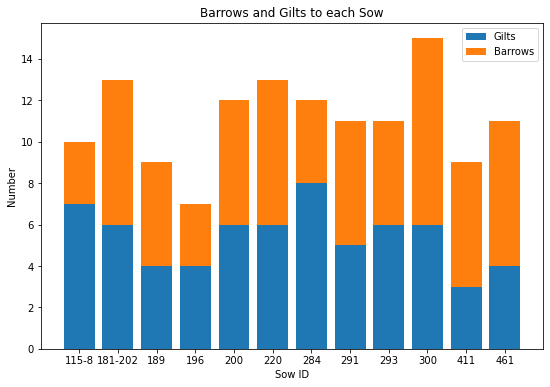

In [488]:
#extract the count of gilts and barrows for each sow

df_sex_ratio = df_litter.groupby(by = "Sow ID", axis =0).sum()[['barrow', 'gilt']]
sow_ID_list = df_sex_ratio.index.to_list()
barrow_list = df_sex_ratio["barrow"].to_list()
gilt_list = df_sex_ratio["gilt"].to_list()

fig, ax = plt.subplots(figsize = (9,6))
ax.bar(sow_ID_list, gilt_list, label = "Gilts")
ax.bar(sow_ID_list, barrow_list, bottom = gilt_list, label = "Barrows")

ax.set_ylabel("Number")
ax.set_xlabel("Sow ID")
ax.set_title("Barrows and Gilts to each Sow")
ax.legend()
plt.savefig("Barrows and Gilts to each Sow.png")
plt.show()

Here I made another histogram that includes the teat counts for both the sows and piglets to get a look at the distribution of teat counts across the entire sample.

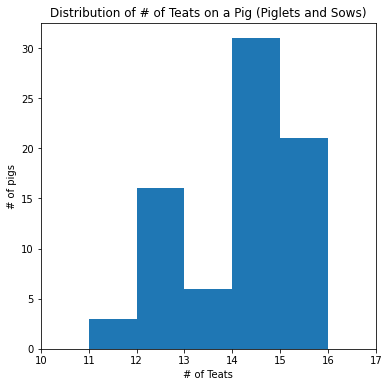

In [489]:
sow_teat = df_sow["Sow's Teat #"].to_list()
piglet_teat = df_litter["Teat #"].dropna().astype(int).to_list()
teat = sow_teat+piglet_teat

bin_edges = list(range(10,18))
plt.figure(figsize = (6,6),)
plt.hist(x = teat,
         bins = 5,
        )
plt.xticks(ticks = bin_edges)
plt.title("Distribution of # of Teats on a Pig (Piglets and Sows)")
plt.xlabel("# of Teats")
plt.ylabel("# of pigs")
plt.savefig("Distribution of # of Teats on a Pig (Piglets and Sows).png")
plt.show()

Hopefully you found that interesting and can see some utility in more dynamic diagrams and statistical analysis tools in future labs.